In [1]:
import numpy as np
import pandas as pd
import shutil
import os
from slugify import slugify

pd.set_option("display.max_colwidth", 100)

%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
def rename(path, lit):
    os.makedirs(f"{path}/renamed", exist_ok=True)
    for _, row in lit.iterrows():
        if os.path.exists(f"{path}/{row['id']}.pdf"):
            shutil.copy(
                f"{path}/{row['id']}.pdf",
                f"{path}/renamed/{row['id']}-{slugify(row['Title'])}.pdf",
            )

<IPython.core.display.Javascript object>

In [3]:
selection_full_text = pd.read_csv("3a-selection-full-text.csv")
selection_full_text["id"] = np.arange(len(selection_full_text)) + 1

rename("3a-selection-full-text", selection_full_text)

<IPython.core.display.Javascript object>

In [4]:
selection = pd.read_csv("3b-selection.csv")

selection = (
    selection.set_index(["Title", "Authors"])
    .join(
        selection_full_text.set_index(["Title", "Authors"])[["id"]].rename(
            columns={"id": "id_a"}
        )
    )
    .reset_index()
)

selection["id"] = np.arange(len(selection)) + 1
os.makedirs(f"3b-selection", exist_ok=True)

for _, row in selection.iterrows():
    shutil.copy(
        f"3a-selection-full-text/{row['id_a']}.pdf", f"3b-selection/{row['id']}.pdf"
    )

selection = selection.drop(columns=["id_a"])
rename("3b-selection", selection)

<IPython.core.display.Javascript object>

In [5]:
backward = pd.read_csv("4a-snowball-backward.csv")
backward.insert(0, "id", np.arange(len(backward)) + 1)

rename("4a-snowball-backward-full-text", backward)

<IPython.core.display.Javascript object>

In [6]:
forward = pd.read_csv("4a-snowball-forward.csv")
forward.insert(0, "id", np.arange(len(forward)) + 1)

rename("4a-snowball-forward-full-text", forward)

<IPython.core.display.Javascript object>

In [7]:
snowball = backward.iloc[0:0]

backward_final = backward.iloc[0:0]
forward_final = backward.iloc[0:0]

i = 1
for (name, iter) in [
    ("backward", backward.iterrows()),
    ("forward", forward.iterrows()),
]:
    for _, row in iter:
        if os.path.exists(f"4b-snowball/{name}/{row['id']}.pdf"):
            shutil.copy(f"4b-snowball/{name}/{row['id']}.pdf", f"4b-snowball/{i}.pdf")

            if name == "backward":
                backward_final = backward_final.append(row)
            else:
                forward_final = forward_final.append(row)

            row["id"] = i

            snowball = snowball.append(row)
            i += 1


rename("4b-snowball", snowball)

<IPython.core.display.Javascript object>

In [8]:
i = 1
for name, df in [("3b-selection", selection), ("4b-snowball", snowball)]:
    for _, row in df.iterrows():
        shutil.copy(f"{name}/{row['id']}.pdf", f"5-final/{i}.pdf")
        i += 1

<IPython.core.display.Javascript object>

In [9]:
final = pd.concat(
    [selection.drop(columns="id"), snowball.drop(columns="id")]
).reset_index(drop=True)
final["id"] = np.arange(len(final)) + 1

final.at[17, "Year"] = 2015

rename("5-final", final)

<IPython.core.display.Javascript object>

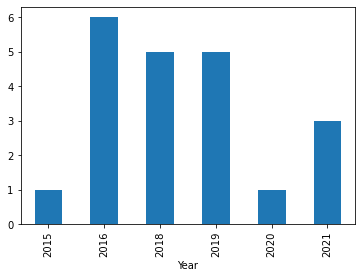

<IPython.core.display.Javascript object>

In [10]:
ax = final.groupby("Year").count()["id"].plot.bar()


In [13]:
final.to_csv("5-final.csv")

<IPython.core.display.Javascript object>

In [12]:
print(final.set_index("id")[["Document Type", "Title", "Authors", "Year"]].to_latex())

\begin{tabular}{llllr}
\toprule
{} &     Document Type &                                                                                                Title &                                                                                              Authors &  Year \\
id &                   &                                                                                                      &                                                                                                      &       \\
\midrule
1  &           Article &                 Performance Analysis of Choreography and Orchestration in Microservices Architecture &                                                                            Kristianto, H., Zahra, A. &  2021 \\
2  &  Conference Paper &         Data management in microservices: State of the practice, challenges, and research directions &                                       Laigner, R., Zhou, Y., Salles, M.A.V., Liu, Y., Kalinowski, M. &  2021 \\

<IPython.core.display.Javascript object>